# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## Assignment 3: Statistical analysis - Part 1

### Goals 

- To transition from data analytics to basic statistical analysis.
- To practice the computation and displaying of summary statistics, percentiles, PMFs and (E)CDFs.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets. 
- To display and interpret bee swarm plots and box-and-whisker plots.
- To visualize and compute pairwise correlations among variables in the dataset.


### Instructions

- This assignment is structured as a single block, using the same dataset throughout.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 107 (plus up to 25 bonus points).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 

-------------------
## The Iris dataset

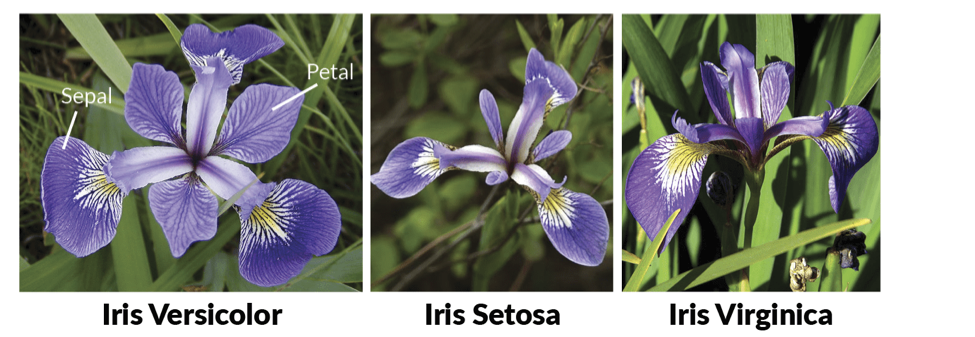

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Histogram and summary statistics 

The code below can be used to display the histogram of versicolor petal lengths (with meaningful labels for the axes and default option for number of bins). 

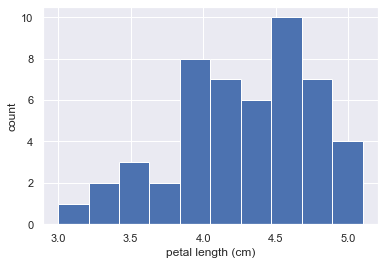

In [2]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()


## Your turn! (12 points)

Write code to:

1. Modify the histogram above, this time using the "square root rule" for the number of bins. (4 pts)

*The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.*

2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (4 pts) 

3. Compute summary statistics (2 pts each): mean and standard deviation 

## Solution

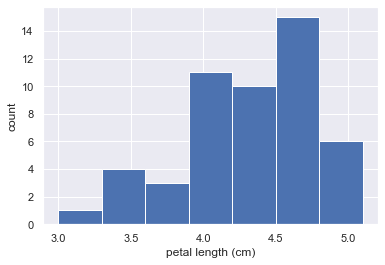

In [3]:
hist_bins=int((len(versicolor_petal_length))**(1/2))

plt.hist(versicolor_petal_length, bins=hist_bins)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

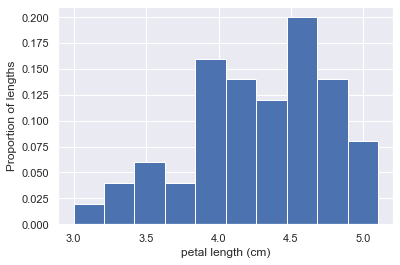

In [4]:
plt.hist(versicolor_petal_length, weights=np.ones(len(versicolor_petal_length))/len(versicolor_petal_length))

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('Proportion of lengths')

# Show histogram
plt.show()

In [5]:
versicolor_petal_lengths=np.array(versicolor_petal_length)

vpl_avg=np.mean(versicolor_petal_lengths)
vpl_std=np.std(versicolor_petal_lengths)

print("Average versicolor petal length: ", vpl_avg)
print("Standard deviation of versicolor petal length: ", vpl_std)

Average versicolor petal length:  4.26
Standard deviation of versicolor petal length:  0.4651881339845203


## Your turn! (6 points)

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species (properly labeld), and the y-axis the petal lengths. 

Your plot should look like this:

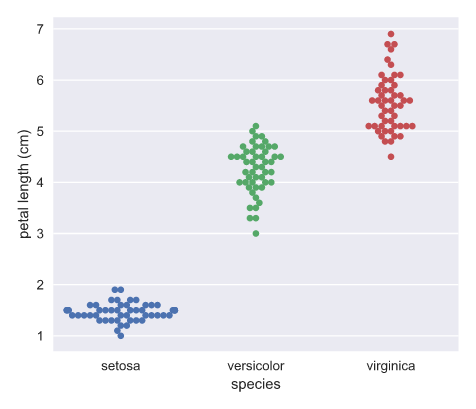

## Solution

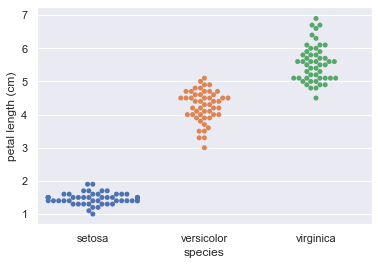

In [6]:
sns.swarmplot(y="petal_length", x="species", data=iris)

plt.ylabel("petal length (cm)")
plt.show()

## Questions 1-2 (12 points, i.e. 6 pts each)

1. Explain the "binning bias" associated with histogram plots.

2. What is a bee swarm plot and in which situations should you (not) use it?

## Solution

1. An ideal histogram usually has a Gaussian (normal) distribution. This requires the bin width to be equal, bins not to be too wide or too narrow, and for the right number of bins to exist. For data that is not disributed in this way, a histogram may not be ideal. 

2. When data points are very close in value, there is the potential to plot data points over each other. This would make the data difficult to visualize. A beeswarm plot solves this issue. It is used to visualize a continuous data variable such that each data point is placed at the minimum distance away from every other data point. In this way, it places emphasis on individual data points rather than binning or grouping them like a histogram. It is less ideal in situations where there is a very large amount of data, and where grouping data points close to the axis or each other does not provide an accurate representation of the data.

## Empirical Cumulative Distribution Function (ECDF)

The function below takes as input a 1D array of data and then returns the x and y values of the ECDF.

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## Your turn! (12 points)

Use the ``ecdf()`` function above to compute the ECDF for the petal lengths of the Iris versicolor flowers (6 pts) and plot the resulting ECDF (6 pts).

Your plot should look like this:

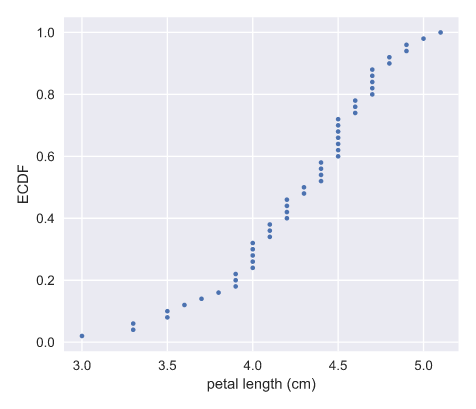

## Solution

[3.  3.3 3.3 3.5 3.5 3.6 3.7 3.8 3.9 3.9 3.9 4.  4.  4.  4.  4.  4.1 4.1
 4.1 4.2 4.2 4.2 4.2 4.3 4.3 4.4 4.4 4.4 4.4 4.5 4.5 4.5 4.5 4.5 4.5 4.5
 4.6 4.6 4.6 4.7 4.7 4.7 4.7 4.7 4.8 4.8 4.9 4.9 5.  5.1]


[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


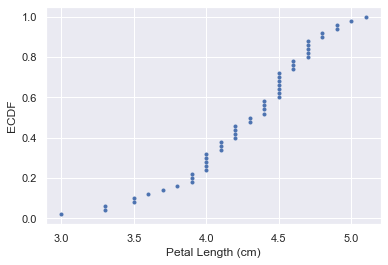

In [8]:
ver_x, ver_y=ecdf(versicolor_petal_lengths)
print(ver_x)
print("\n")
print(ver_y)

plt.plot(ver_x, ver_y,'.')

plt.xlabel("Petal Length (cm)")
plt.ylabel("ECDF")

plt.show()

## Your turn! (8 points)

Write code to plot ECDFs for the petal lengths of all three iris species.

Your plot should look like this:

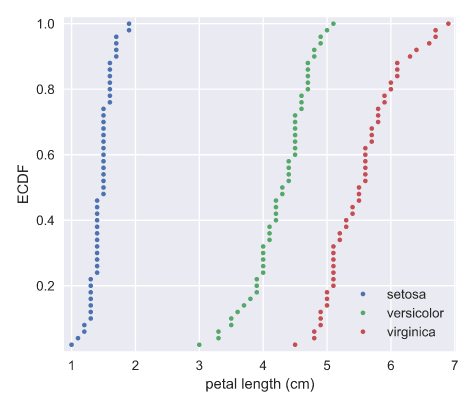

## Solution

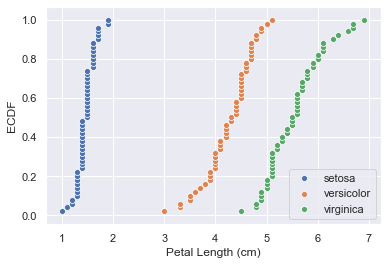

In [9]:
species=iris['species'].unique()

for sp in species:
    slice_= iris[iris['species'] == sp].petal_length    
    sp_x, sp_y=ecdf(slice_)
    sns.scatterplot(x=sp_x, y=sp_y, label=sp)
    
plt.xlabel("Petal Length (cm)")
plt.ylabel("ECDF")

plt.show()

## Percentiles

The code below computes the 25th, 50th, and 75th percentiles for the petal lengths of the Iris versicolor species and overlays the results on top of the ECDF.

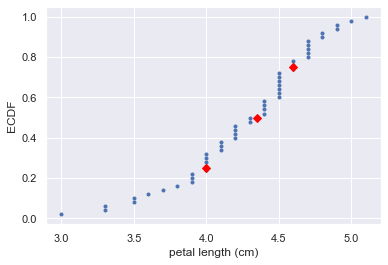

In [10]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)

# Compute ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

## Your turn! (10 points)

Write code to compute the 25th, 50th, and 75th percentiles for the petal lengths of and plot the resulting values overlaid with the corresponding ECDFs for all three iris species.


## Solution

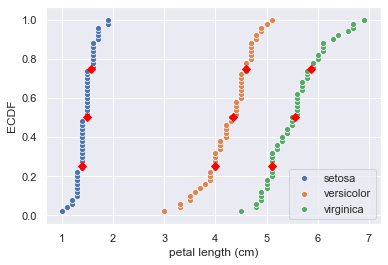

In [11]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
for sp in species:
    slice_= iris[iris['species'] == sp].petal_length
    sp_percentiles=np.percentile(slice_, percentiles)
    # Compute ECDF
    sp_x, sp_y=ecdf(slice_)
    # Plot the ECDF
    _ = sns.scatterplot(x=sp_x, y=sp_y, label=sp)
    # Overlay percentiles as red diamonds.
    _ = plt.plot(sp_percentiles, percentiles/100, marker='D', color='red',
         linestyle='none')

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

## Box-and-whisker plots

Box-and-whisker plots (or simply box plots) show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

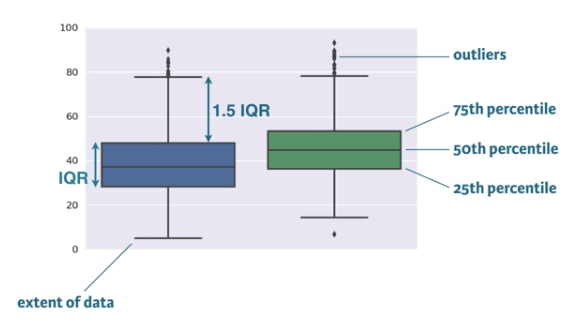

## Your turn! (10 points)

Write code to display the box-and-whisker plot for the petal lengths of all three iris species.

Your plot should look like this:

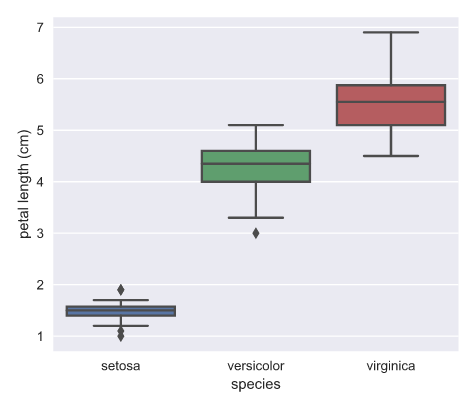

## Solution

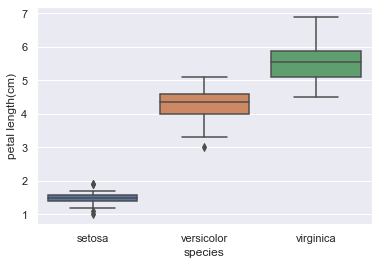

In [12]:
sns.boxplot(x='species', y='petal_length', data=iris)

plt.xlabel("species")
plt.ylabel("petal length(cm)")

plt.show()

## Questions 3-4 (6 points, i.e. 3 pts each)

3. Which species has the largest/smallest standard deviation?
4. Which species has the largest/smallest number of outliers?

## Solution

3. Virginica has the largest standard deviation. Setosa has the smallest standard deviation.

4. Setosa has the largest number of outliers. Virginica has the smallest number of outliers.

## Bonus! (10 points)

Write code to display the box-and-whisker plot combined with the bee swarm plot for the petal lengths of all three iris species.

## Solution

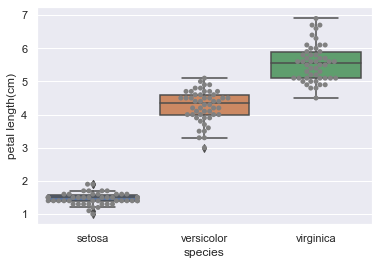

In [13]:
sns.swarmplot(y="petal_length", x="species", data=iris, color='0.5')

plt.ylabel("petal length (cm)")

sns.boxplot(x='species', y='petal_length', data=iris)

plt.xlabel("species")
plt.ylabel("petal length(cm)")

plt.show()

## Scatter plots, pair plots, and correlation between two variables

The code below:

1. Displays the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset.
2. Computes the covariance matrix for the versicolor species.
3. Computes the Pearson correlation coefficient between petal length and petal width for the versicolor species.


Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667


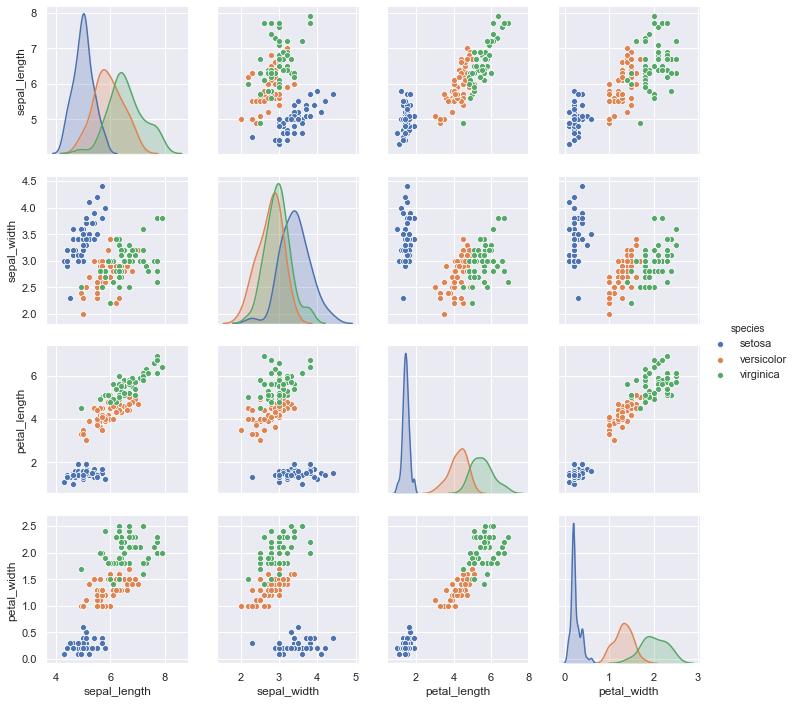

In [14]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Compute 1D arrays for petal length and width
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))

## Bonus! (15 points)

Extend the code above to compute the Pearson correlation coeficients for all pair-wise combinations of all three Iris species and display the results in a table format.

## Solution

In [15]:
setosa=iris[iris.species=='setosa']
setosa_corr=setosa.corr(method='pearson')
print("Setosa pearson correlation: ")
setosa_corr

Setosa pearson correlation: 


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


In [16]:
versicolor=iris[iris.species=='versicolor']
versicolor_corr=versicolor.corr(method='pearson')
print("Versicolor pearson correlation: ")
versicolor_corr

Versicolor pearson correlation: 


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


In [17]:
virginica=iris[iris.species=='virginica']
virginica_corr=virginica.corr(method='pearson')
print("Setosa pearson correlation: ")
virginica_corr

Setosa pearson correlation: 


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


## Question 5 (6 points)

5. Should the Pearson correlation coefficient be replaced with the Spearman rank-order correlation coefficient in this case? Why (not)?

## Solution

5. Pearson correlation measures the linear correlation between two variables. Spearman rank correlation measures the correlation between two monotonic variables. While linear variables are monotonic, they are also strictly monotonic. Based on the Pearson correlation result above, we can see that versicolor petal length and petal width have a strong linear correlation, so Pearson correlation is more useful than Spearman in this case.

## Conclusions (25 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

1. In this assignment, I learned what a bee swarm plot is and in what situations it should be used. I also learned about Pearson and Spearman rank correlation.

2. It was enlightening learning that Pandas dataframes have a correlation function that calculates a certain type of correlation for you. It was fun to relaize that all that was necessary to combine two plots in Python and overlay them on each other is to stack calls to the plot function on top of each other.

3. If I had an additional week to work on this, I would investigate the data using other correlation methods besides Pearson. Perhaps these other values will represent the data even better than Pearson.